<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/CristhianA/TALLER/Dia%2002/EJERCICIO_05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Importando las librerías
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Habilitando gráficos interactivos en Jupyter Notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#

In [33]:
d=pd.read_csv("articulos_ml.csv")
d

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


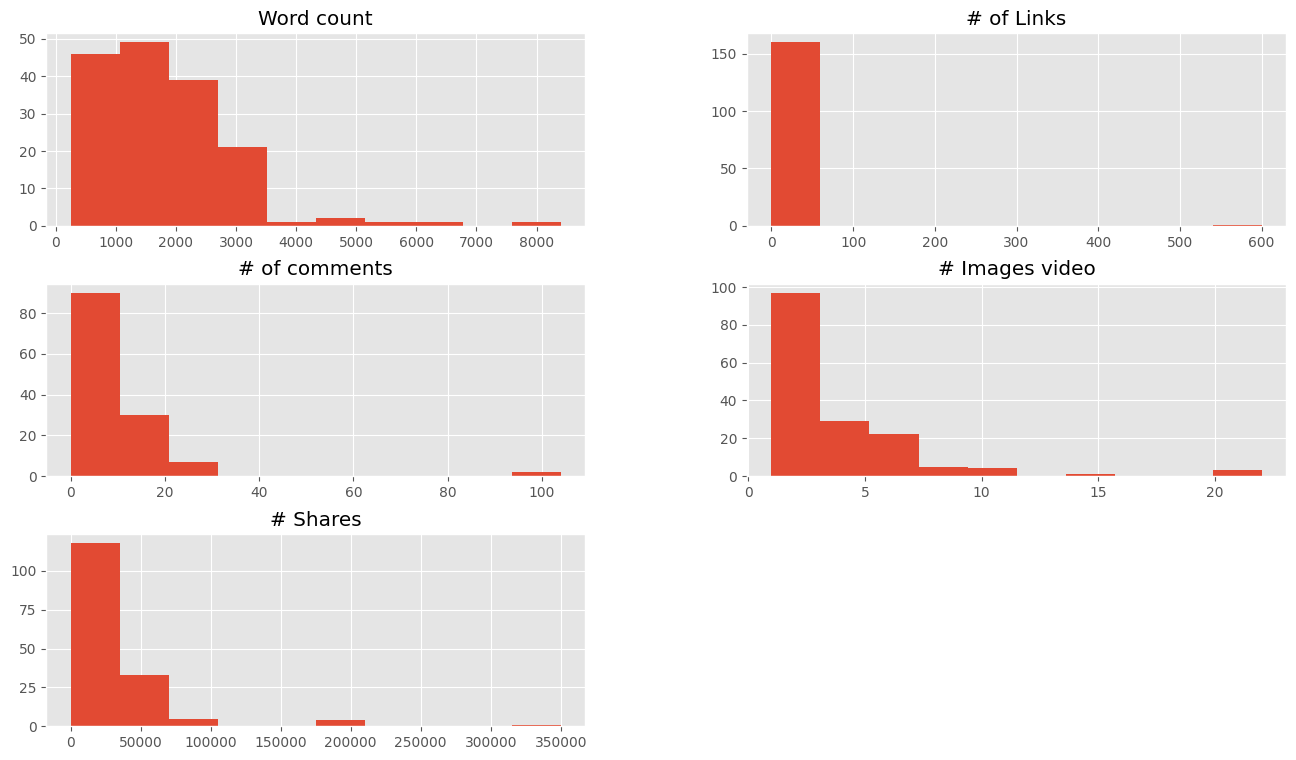

In [34]:
d.describe()
d.drop(['Title','url','Elapsed days'],axis=1).hist()
plt.show()

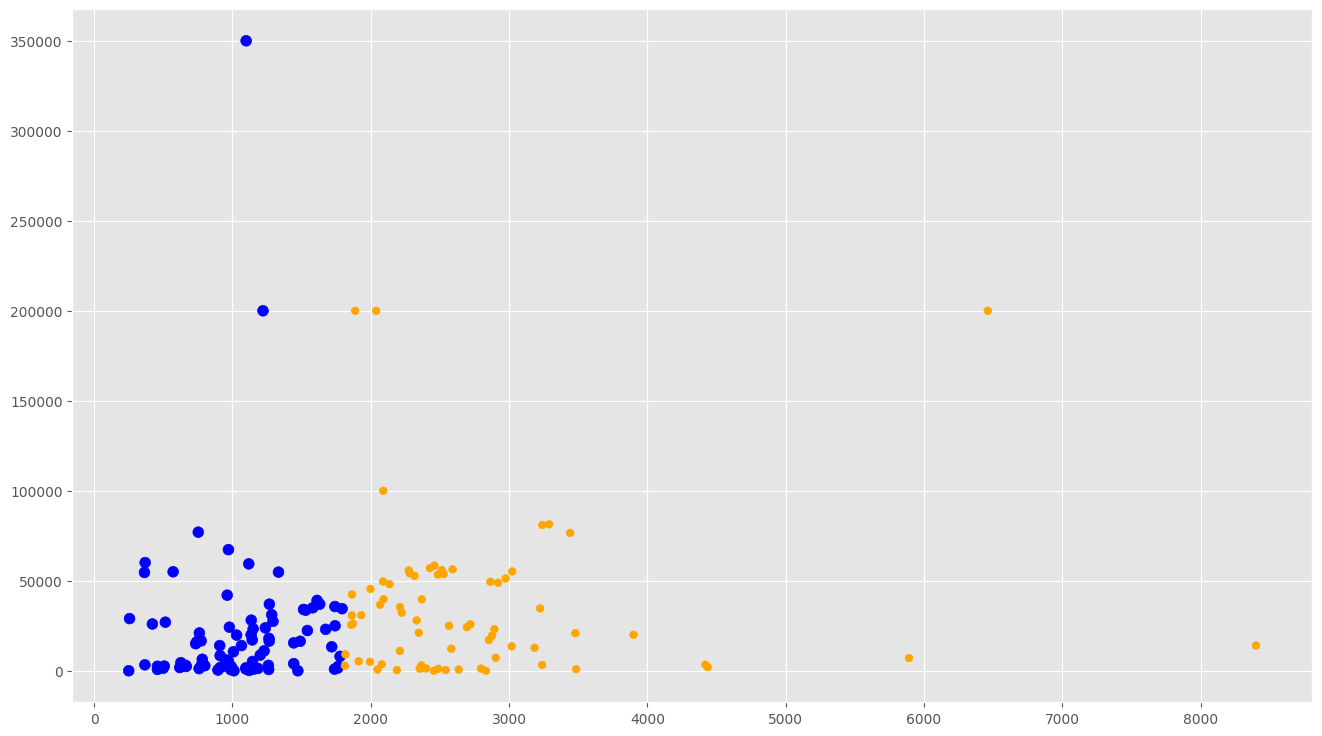

In [35]:
import matplotlib.pyplot as plt

# Suponiendo que 'd' es un DataFrame con las columnas 'Word count' y '# Shares'
Co = ['orange', 'blue']
Tam = [30, 60]
f1 = d['Word count'].values
f2 = d['# Shares'].values

# Crear una lista vacía para asignar colores
asignar = []

# Asignar colores según el valor de 'Word count'
for index, row in d.iterrows():
    if row['Word count'] > 1808:
        asignar.append(Co[0])  # Naranja
    else:
        asignar.append(Co[1])  # Azul

# Crear el gráfico de dispersión con tamaños de puntos variados
plt.scatter(f1, f2, c=asignar, s=[Tam[0] if row['Word count'] > 1808 else Tam[1] for _, row in d.iterrows()])
plt.show()


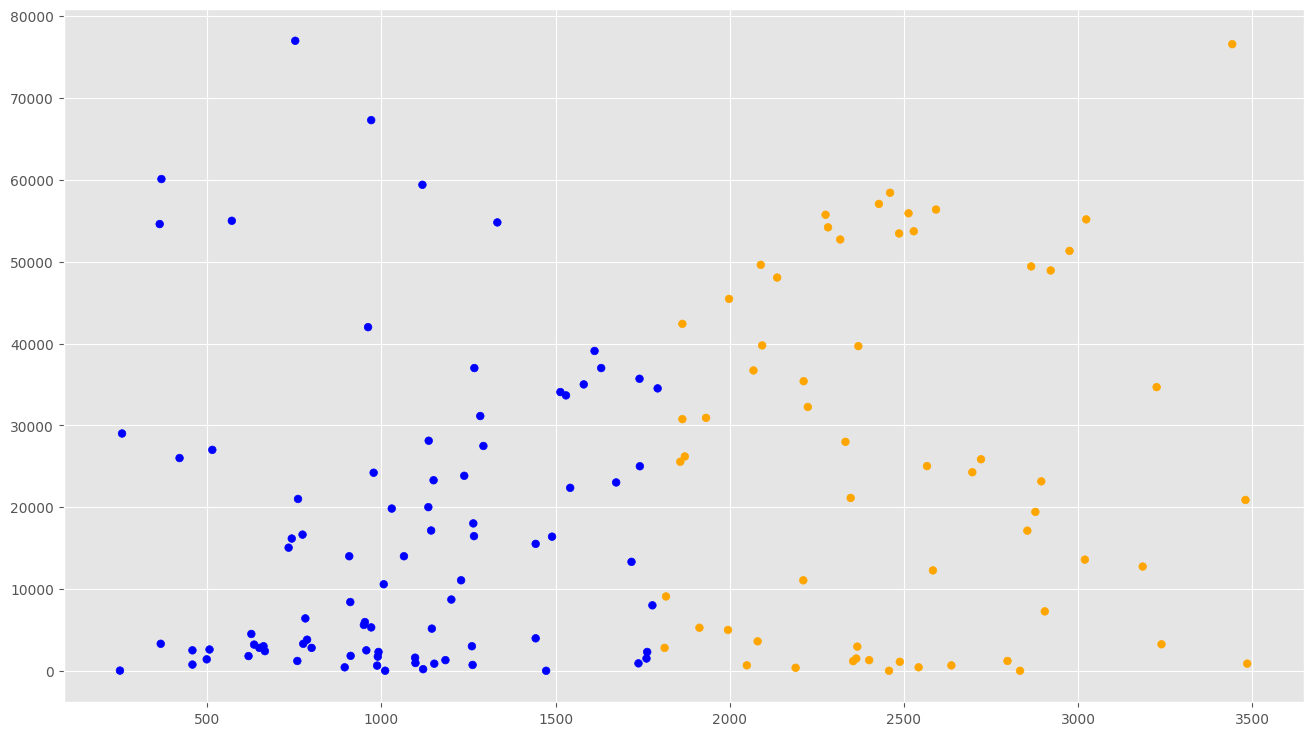

In [36]:
#Filtrar informacion relevante
filD=d[(d['Word count']<=3500)&(d['# Shares']<=80000)]
f1=filD['Word count'].values
f2=filD['# Shares'].values
asignar=[] # Re-initialize the list
for index, row in filD.iterrows():
    if (row['Word count']>1808):
        asignar.append(Co[0])
    else:
        asignar.append(Co[1])
plt.scatter(f1,f2,c=asignar,s=Tam[0])
plt.show()

In [37]:
#Estadisticas
filD.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


In [38]:
#Aplicar modelo de regresino lineal
regr=linear_model.LinearRegression()
#Declarar variables
dataX=filD[['Word count']]
xe=np.array(dataX)
ye=filD['# Shares'].values
#Entrenando modelo
regr.fit(xe,ye)
#Hacer prediccin
yp=regr.predict(xe)

In [39]:
#Mostrar Coeficinetes
print("Coeficientes: \n",regr.coef_)
print("Termino independiente: \n",regr.intercept_)
print("Error cuadrado medio: \n", mean_squared_error(ye,yp))
print("Varianza: %.2f",r2_score(ye,yp))

Coeficientes: 
 [5.69765366]
Termino independiente: 
 11200.30322307416
Error cuadrado medio: 
 372888728.3398661
Varianza: %.2f 0.05519842281951404


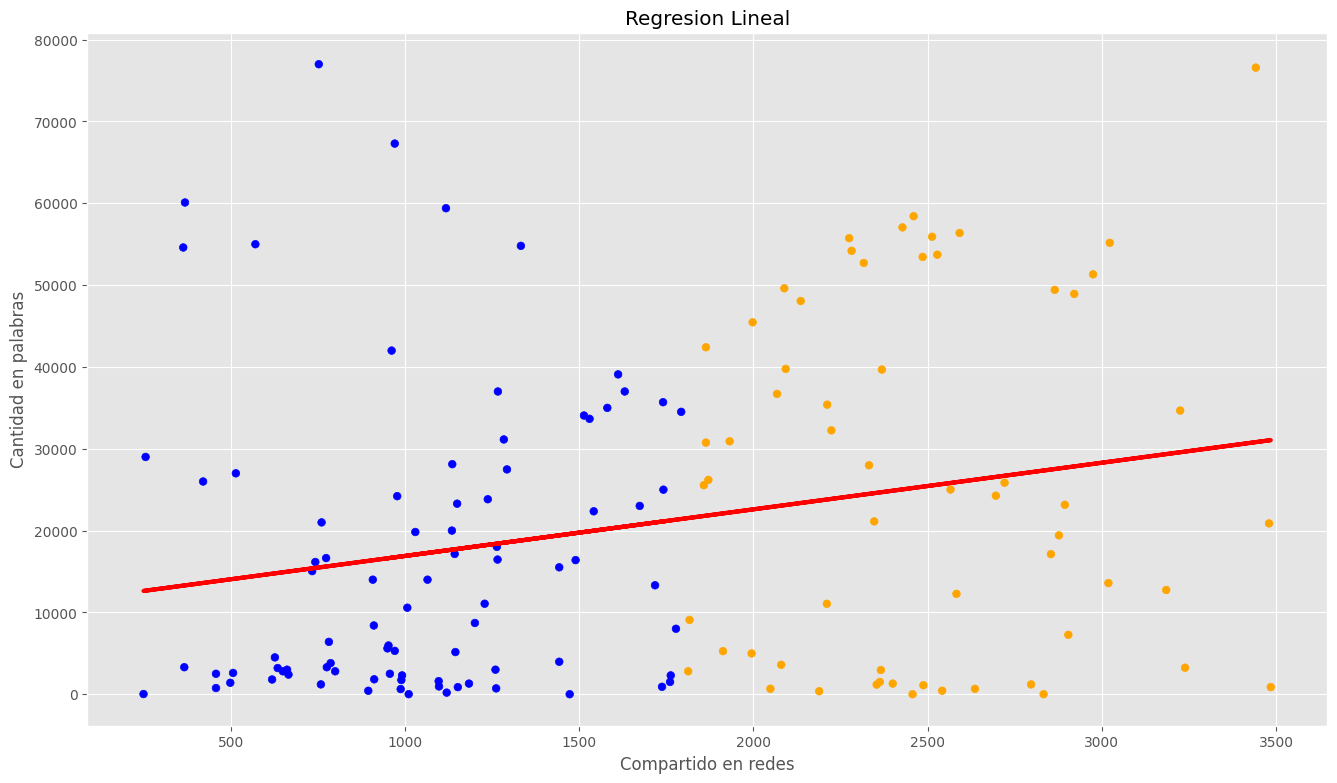

In [40]:
#Graficamos
plt.scatter(xe[:,0],ye,c=asignar,s=Tam[0])
plt.plot(xe[:,0],yp,color='red',linewidth=3)
plt.ylabel("Cantidad en palabras")
plt.xlabel("Compartido en redes")
plt.title("Regresion Lineal")
plt.show()

# REGRESION LINEAL MULTIPLE

In [43]:
#REGRESION LINEAL MULTIPLE
res=(filD['# of Links']+filD['# of comments'].fillna(0)+filD['# Images video'])
dx2=pd.DataFrame()
dx2['Word count']=filD['Word count']
dx2['res']=res
xyt=np.array(dx2)
zt=filD['# Shares']

In [45]:
#xy dimensiones para predecir z
regr2=linear_model.LinearRegression()
regr2.fit(xyt,zt)
zp=regr2.predict(xyt)
print("Coeficientes: \n",regr2.coef_)
print("Error cuadrado medio: \n", mean_squared_error(zt,zp))
print("Varianza: %.2f",r2_score(zt,zp))

Coeficientes: 
 [   6.63216324 -483.40753769]
Error cuadrado medio: 
 352122816.4791501
Varianza: %.2f 0.107813760282097


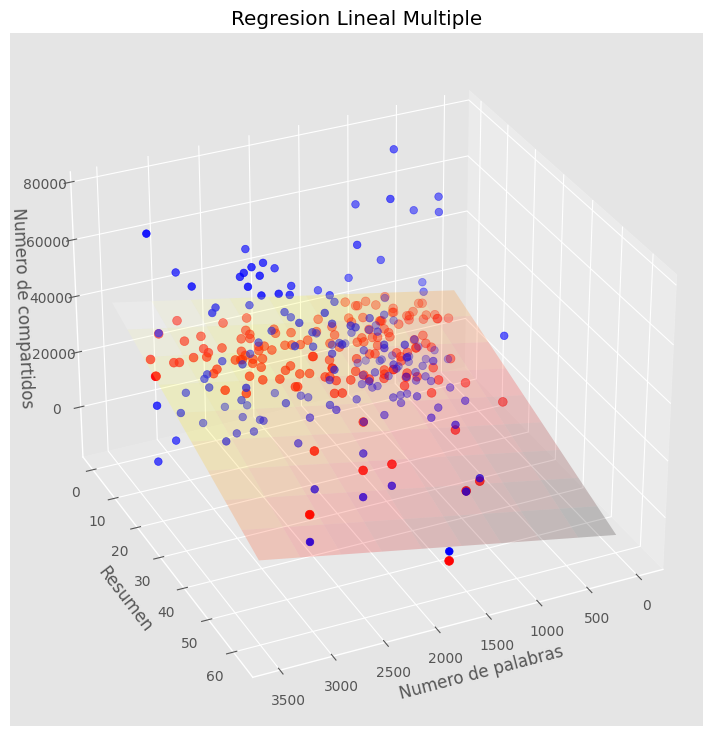

In [50]:
#Graficamos en 3d
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
xx,yy=np.meshgrid(
    np.linspace(0,3500,num=10),
    np.linspace(0,60,num=10)
)
nx=regr2.coef_[0]*xx
ny=regr2.coef_[1]*yy
z=(nx+ny+regr2.intercept_)
ax.plot_surface(xx,yy,z,alpha=0.2,cmap='hot')
ax.scatter(xyt[:,0],xyt[:,1],zt,c='blue',s=30)
ax.scatter(xyt[:,0],xyt[:,1],zp,c='red',s=40)
ax.view_init(elev=30,azim=65)
ax.set_xlabel('Numero de palabras')
ax.set_ylabel('Resumen')
ax.set_zlabel('Numero de compartidos')
ax.set_title('Regresion Lineal Multiple')
plt.show()
